# Evaluating Measures of Distinctiveness

Or: Testing Quarto for JCLS

Keli Du
[](https://orcid.org/https://orcid.org/0000-0001-7800-0682)  
Julia Dudar
[](https://orcid.org/https://orcid.org/0000-0001-5545-9562)  
Christof Schöch
[](https://orcid.org/https://orcid.org/0000-0002-4557-2753)  
11/27/22

This paper concerns an empirical evaluation of nine different measures
of distinctiveness or ‘keyness’ in the context of Computational Literary
Studies. We use nine different sets of literary texts (specifically,
novels) written in seven different languages as a basis for this
evaluation. The evaluation is performed as a downstream classification
task, where segments of the novels need to be classified by subgenre or
period of first publication. The classifier receives different numbers
of features identified using different measures of distinctiveness. The
main contribution of our paper is that we can show that across a wide
variety of parameters, but especially when only a small number of
features is used, (more recent) dispersion-based measures very often
outperform other (more established) frequency-based measures by
significant margins. Our findings support an emerging trend to consider
dispersion as an important property of words in addition to frequency.

# 1. Introduction

Edward Tufte, the pioneer of data visualization, famously wrote: “At the
heart of quantitative reasoning is a single question: Compared to what?”
(Tufte 1990, 67). And indeed, any number or value established in some
way can only really be endowed with meaning when it is placed in the
context of other, comparable numbers or values. One may think of several
fundamental strategies for such a contextualization of numbers. Taking
the same measurement at different times is one such strategy and taking
the same measurement in different subsets of a dataset is another. Each
of these strategies comes with typical statistical operations for the
comparison of the values, such as regression to determine a trend over
time or a test of statistical significance to compare the distributions
of values in two subsets of a dataset (Diez, Cetinkaya-Rundel, and Barr
2019).

What the above observation points to is that comparison is a fundamental
operation in many domains operating with numerical values. This is also
true, however, for many text-based domains of research, whether
statistically-oriented or not (Klimek and Müller 2015). The research we
report on here brings both strands together in the sense that it is
located at the intersection of literary studies and statistics. More
precisely, our research is concerned with modeling, implementing,
evaluating and using statistical measures of comparison of two or
several groups of texts. The measures we focus on are used to identify
characteristic or distinctive features of each group of texts in order
to gain an evidence-based understanding of the specific contents, style
and/or structure of these groups of texts. As we describe below, such
measures have been developed in domains such as Information Retrieval
(IR), Corpus and Computational Linguistics (CL), or Computational
Literary Studies (CLS). In our research, we bring together knowledge and
insight from these domains with the general objective of fostering a
better understanding of measures of distinctiveness.

The research we report on in this contribution is set in the wider
context of our research into measures of distinctiveness for comparison
of groups of texts. Previously, we have worked on the issue of
qualitative validation of measures of distinctiveness (see (Schröter et
al. 2021). We have also implemented a wide range of measures of
distinctiveness in our Python package *pydistinto*.[1] With the current
contribution, we focus on the step of evaluating the performance of a
substantial range of such measures using a downstream classification
task.

Our paper is structured as follows: First, we summarize related work (a)
describing different measures of distinctiveness and (b) specifically
comparing several measures of distinctiveness to each other
([Section 2](#sec-02)). We go on to describe the different corpora we
have used for our study ([Section 3](#sec-03)) as well as the methods
used to perform the evaluation task and to analyze the results
([Section 4](#sec-04)). We then discuss the results we have obtained,
first in a single-language setting, then in a multi-language setting
([Section 5](#sec-05)). We close our contribution by summarizing our key
findings and describing possible future work ([Section 6](#sec-06)).

# 2. Related Work

# 3. Corpora

For our analysis we used nine text collections. The first two corpora
consist of contemporary popular novels in French published between 1980
and 1999 (160 novels published in the 1980s and 160 novels published in
the 1990s). To enable the comparison and classification of texts, we
designed these custom-built corpora in a way that they contain the same
number of novels for each of four subgroups: highbrow novels on the one
hand, and lowbrow novels of three subgenres (sentimental novels, crime
fiction and science fiction) on the other. The texts in these corpora
are, for obvious reasons, still protected by copyright. As a
consequence, we cannot make these corpora freely available as full
texts. We have published them, however, in the form of a so-called
“derived text format” (Schöch et al. (2020), Organisciak and Downie
(2021)) suitable for use with our Python library and devoid of any
copyright protection.[2]

Another group of text corpora that we used for our analysis consists of
seven collections of novels in seven different European languages taken
from the (ELTeC) produced in the COST Action *Distant Reading for
European Literary History* (see Burnard, Schöch, and Odebrecht (2021);
Schöch et al. (2021)).[3] We reuse the English, French, Czech, German,
Hungarian, Portuguese and Romanian corpora. From each of these corpora,
we selected a subset of 40 novels: 20 novels from the period from 1840
to 1860 and 20 novels from the period from 1900 to 1920.

| name      | size (million words) | standard deviation | mean    | types   | authors |
|----------|-------------------|------------------|---------|---------|---------|
| fra_80s   | 8.83                 | 27,161             | 55,225  | 119,775 | 120     |
| fra_90s   | 8.48                 | 26,976             | 53,010  | 111,501 | 124     |
| ELTec_cze | 1.98                 | 24,734             | 49,642  | 163,900 | 33      |
| ELTec_deu | 4.62                 | 101,915            | 115,531 | 158,726 | 30      |
| ELTec_eng | 4.66                 | 75,672             | 116,477 | 53,285  | 35      |
| ELTec_fra | 3.31                 | 86,926             | 82,802  | 65,799  | 37      |
| ELTec_hun | 2.44                 | 40,513             | 61,055  | 258,026 | 36      |
| ELTec_por | 2.33                 | 38,787             | 58,325  | 95,572  | 34      |
| ELTec_rom | 2.41                 | 36,493             | 60,395  | 156,103 | 37      |

Table 1: Overview of the corpora used in our experiments.

The [Table 1](#tbl-corpora) gives a short overview of the measures of
distinctiveness implemented in our Python library, along with their
references and information about studies in which they were evaluated.
Under the heading \`Type of measure’, we very roughly characterize the
underlying kind of quantification of the unit of measurement. As all the
measures have different mathematical calculations and describing all of
them in detail goes beyond the scope of this paper, we propose this
typology as a brief and simplified review that summarizes the key
characteristics of the implemented measures.

# 4. Results

## 4.1 Classification of French Popular Novel Collections (1980s and 1990s)

[Figure 1](#fig-01) shows the classification results of the
1980s-corpus. The Decision Tree Classifier has a clearly lower
performance than the other three classifiers. The other three
classifiers produce better results with similar trends of F1-scores
across different measures. Therefore, in our further experiments we
focus on results based on one classifier, namely the Multinominal NB.[4]
The classification results of the 1990s-corpus, for this preliminary
test, are very similar to the results presented in [Figure 1](#fig-01)
and thus are not shown here.

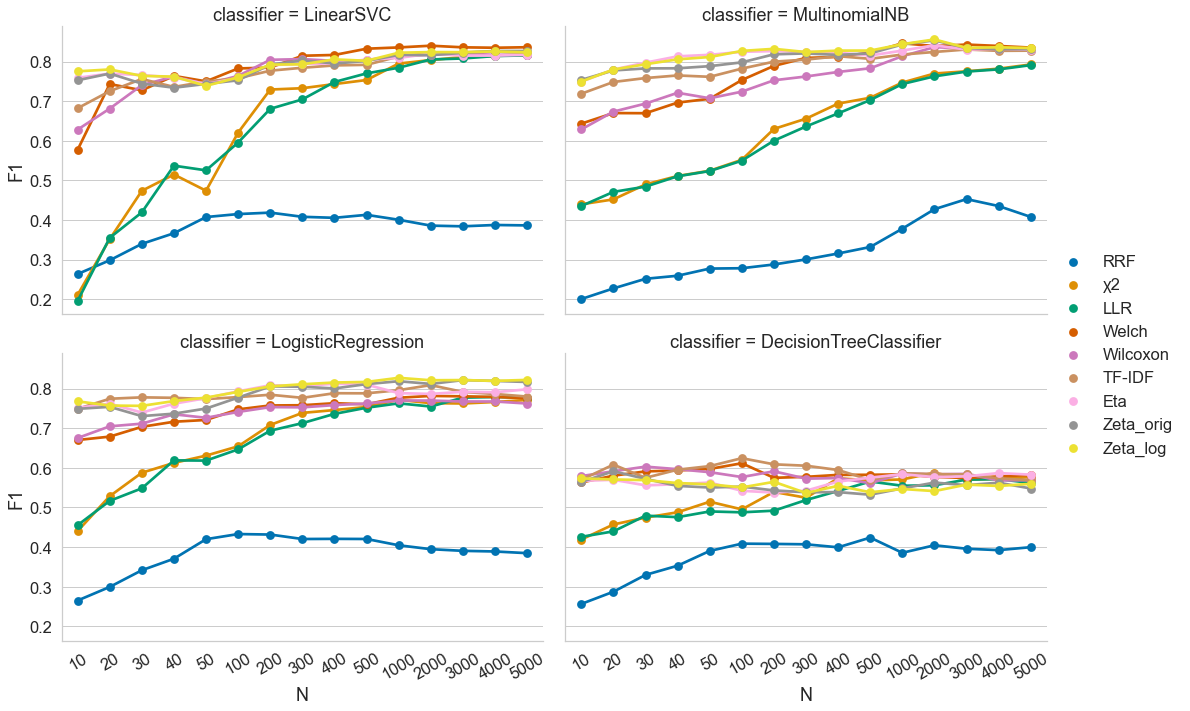

[Figure 2](#fig-02) shows the F1-macro score distribution from 10 fold
cross-validation for classification of the French novel segments of the
1980s-dataset. The setting of $N$ varies from 10 to 5000. The baseline
is visualized as a green line in the plot. It corresponds to the average
of the classification results based on *N \* 8* random words, resampled
1000 times.

[1] See: <https://github.com/Zeta-and-Company/pydistinto>, DOI:
[10.5281/zenodo.6517683](https://doi.org/10.5281/zenodo.6517683).

[2] See URL: <https://github.com/Zeta-and-Company/derived-formats>; DOI:
[https://doi.org/10.5281/zenodo.7111522](10.5281/zenodo.7111522).

[3] Texts and metadata for these collections are available on Github:
<https://github.com/COST-ELTeC>; DOI:
[https://doi.org/10.5281/zenodo.4662444](10.5281/zenodo.3462435). On the
COST Action more generally, see also:
<https://www.distant-reading.net/>.

[4] According to
[scikit-learn.org/stable/tutorial/machine_learning_map/index.html](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html),
Naive Bayes methods are suggested for classification of text data.

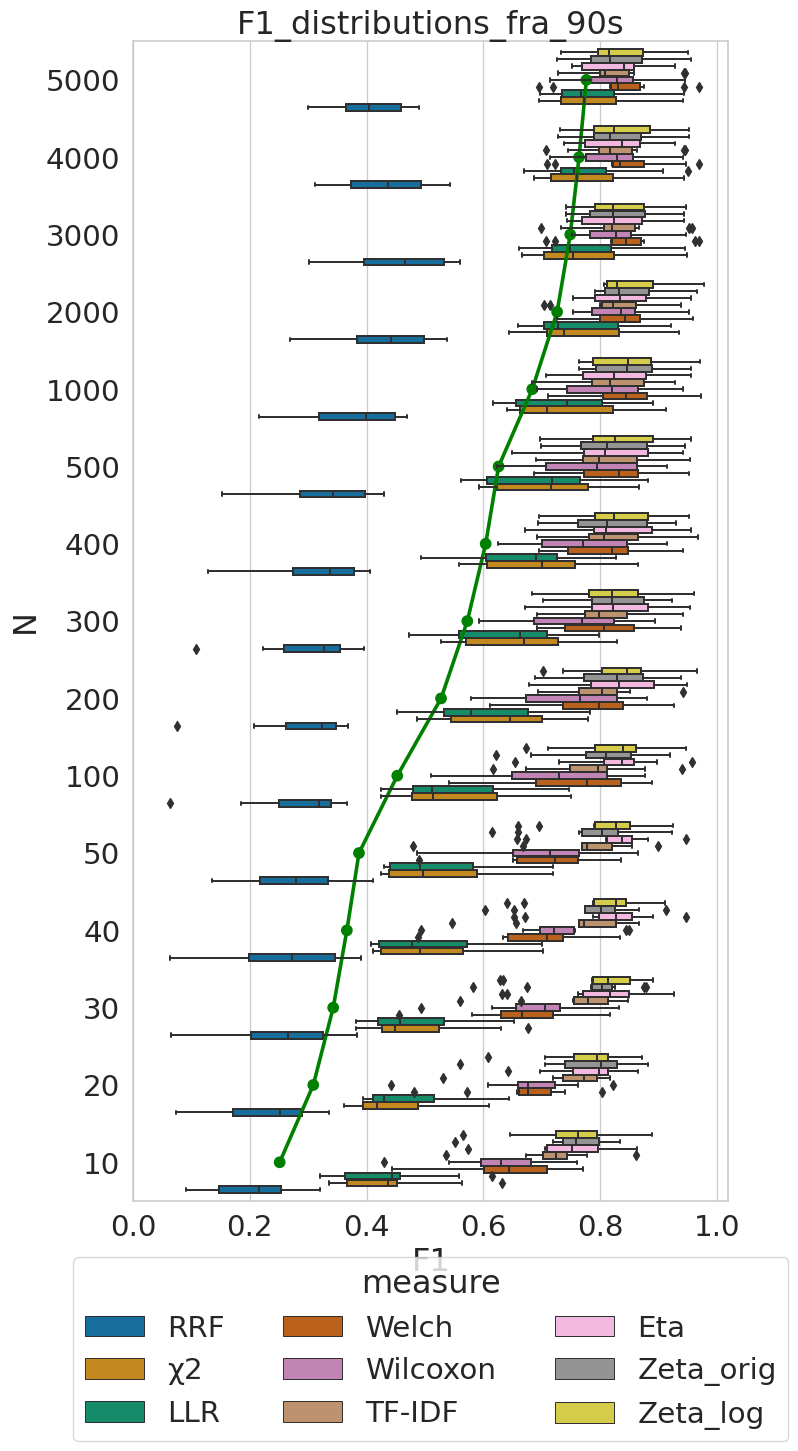

In [1]:
# === Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

# === Functions

def load_resultsdata(): 
    resultsfile = join("data", 
        "classification_results_fra_80s.csv")
    with open(resultsfile, "r", encoding="utf8") as infile:
        resultsdata = pd.read_csv(infile, sep='\t')
        resultsdata = resultsdata.loc[resultsdata['classifier'] == 'MultinomialNB']
        resultsdata = resultsdata.loc[resultsdata['measure'] != 'KL_Divergence']
        resultsdata = resultsdata.sort_values(by=['f1_macro_mean'])
    return resultsdata

def load_randomdata(): 
    randomfile = join("data", 
        "random_words_classification_results_fra_80s.csv")
    with open(randomfile, "r", encoding="utf8") as infile: 
        randomdata = pd.read_csv(randomfile, sep='\t')
        randomdata = randomdata.loc[randomdata['classifier'] == 'MultinomialNB']
    return randomdata

def visualize_classification(): 
    resultsdata = load_resultsdata()
    randomdata = load_randomdata()
    order = ['RRF', 'χ2', 'LLR', 'Welch', 'Wilcoxon', 'TF-IDF','Eta', 'Zeta_orig', 'Zeta_log']
    sns.set(font_scale=2)
    sns.set_style("whitegrid")
    f, ax = plt.subplots(figsize = (8,16))
    sns.pointplot(
        y="N", x="F1_macro_mean", data=randomdata, 
        orient='h', color='green')
    g = sns.boxplot(
        y='N', x='F1', data=resultsdata, hue='measure', 
        orient='h', showfliers=True, palette="colorblind", 
        hue_order = order)
    g.legend(title='measure', loc='lower center', 
        bbox_to_anchor=(0.5, -0.22), ncol=3)
    ax.invert_yaxis()
    ax.set_title('F1_distributions_fra_90s')
    ax.set(xlim=(0, 1.02))
    plt.show()

visualize_classification()

# 5. Multilingual Setting

# 6. Conclusion

# 7. References

Burnard, Lou, Christof Schöch, and Carolin Odebrecht. 2021. “In Search
of Comity: TEI for Distant Reading.” *Journal of the Text Encoding
Initiative*, no. 14. <https://doi.org/10.4000/jtei.3500>.

Diez, David, Mine Cetinkaya-Rundel, and Christopher D. Barr. 2019.
*OpenIntro Statistics*. 4th ed. OpenIntro.
<https://www.openintro.org/book/os/>.

Klimek, Sonja, and Ralph Müller. 2015. “Vergleich Als Methode? Zur
Empirisierung Eines Philologischen Verfahrens Im Zeitalter Der Digital
Humanities.” *Journal of Literary Theory*, no. 9, 1.
<https://doi.org/10.1515/jlt-2015-0004>.

Organisciak, Peter, and J. Stephen Downie. 2021. “Research Access to
in-Copyright Texts in the Humanities.” In *Information and Knowledge
Organisation in Digital Humanities*, 157–77. Routledge.
<https://doi.org/10.4324/9781003131816-8>.

Schöch, Christof, Frédéric Döhl, Achim Rettinger, Evelyn Gius, Peer
Trilcke, Peter Leinen, Fotis Jannidis, Maria Hinzmann, and Jörg Röpke.
2020. “Abgeleitete Textformate: Text Und Data Mining Mit
Urheberrechtlich Geschützten Textbeständen.” *Zeitschrift Für Digitale
Geisteswissenschaften*. <https://doi.org/10.17175/2020_006>.

Schöch, Christof, Roxana Patras, Tomaž Erjavec, and Diana Santos. 2021.
“Creating the European Literary Text Collection (ELTeC): Challenges and
Perspectives.” *Modern Languages Open*, no. 1: 1–19.
<https://doi.org/10.3828/mlo.v0i0.364>.

Schröter, Julian, Keli Du, Julia Dudar, Cora Rok, and Christof Schöch.
2021. “From Keyness to Distinctiveness – Triangulation and Evaluation in
Computational Literary Studies.” *Journal of Literary Theory (JLT)*, no.
9, 1–2: 81–108. <https://doi.org/10.1515/jlt-2021-2011>.

Tufte, Edward R. 1990. *Envisioning Information*. Graphics Press.

# 8. Appendix A: General remarks about this test

## 8.1 Notes

-   Impressive overall!
-   The mode of testing is installing Quarto locally and using VS Code
    to edit files. How this would work as a collaborative, online editor
    is another question. Github integration would clearly be an option,
    but then it is not concurrent editing, but push/pull to a repo:
    doable, but with its own issues.
-   \[SOLVED\] How can I place the appendices after the references? =\>
    Use the refs attribute (see above).
-   Many more options for metadata and formatting in different output
    formats.
-   Der “folded code” im HTML-Beispiel ist besonders cool (geht im PDF
    naturgemäß nicht). Noch coller ist allerdings die Notebook-Version,
    die dann auf einem Localhost-Port läuft.

## 8.2 The equations example

Einstein’s theory of special relatively that expresses the equivalence
of mass and energy:

$E = mc^{2}$